<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_11/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_3.%20%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 딥러닝 준비**

## **1-5. 경사 하강법**

**경사 하강법 구현**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 샘플에 활용할 데이터 셋 만들기

def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w * x + b

  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise

  # 시각화
  plt.figure(figsize = (10, 7))
  plt.plot(x, y, color = 'r', label = f'y = {w}*x + {b}')
  plt.scatter(x, yy, label = 'data')
  plt.legend(fontsize = 20)
  plt.show()

  print(f'w: {w}, b: {b}')

  return x, yy

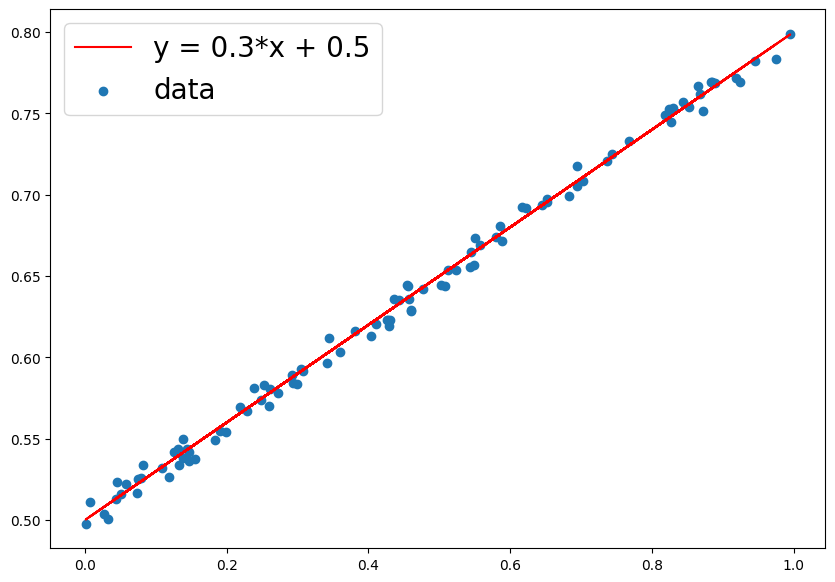

w: 0.3, b: 0.5


In [3]:
x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)

**gradient 최적화**

In [4]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low = 0.0, high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5 * ((y_hat - y) ** 2).sum()
  if error < 0.005:
    break

  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.52848, b = 0.64292 error = 20.89380
 5 w = 0.41012, b = 0.44861 error = 0.05439
10 w = 0.39247, b = 0.45484 error = 0.03806
15 w = 0.37830, b = 0.46167 error = 0.02762
20 w = 0.36633, b = 0.46746 error = 0.02017
25 w = 0.35620, b = 0.47235 error = 0.01483
30 w = 0.34764, b = 0.47649 error = 0.01102
35 w = 0.34041, b = 0.47999 error = 0.00830
40 w = 0.33429, b = 0.48294 error = 0.00635
------------------------------------------------------------
45 w = 0.3, b = 0.5 error = 0.00496


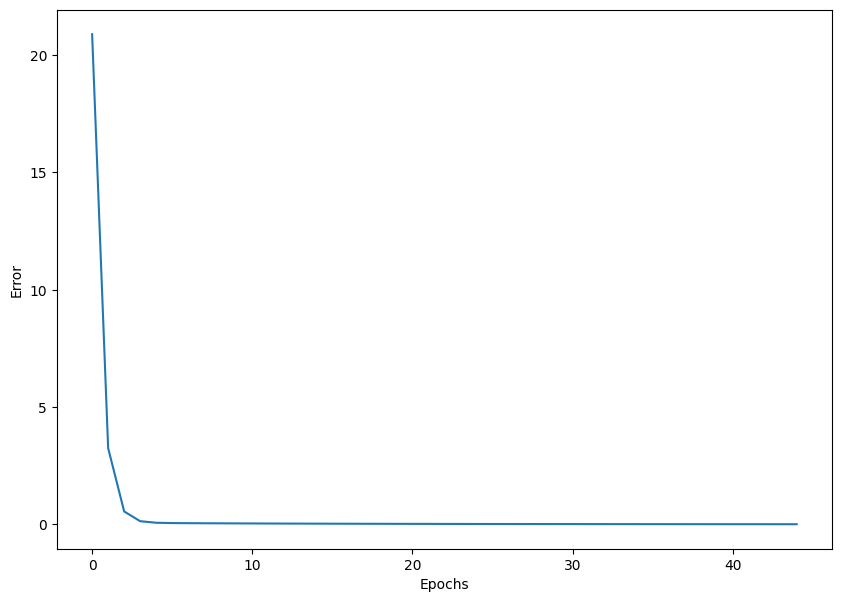

In [5]:
### 시각화

plt.figure(figsize = (10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

- 샘플 데이터셋 생성 시 설정한 w, b 계수와 비슷한 값으로 w, b가 수렴함

# **2. 단순 신경망 훈련**

## **2-4. 데이터셋 만들기**

**단순 선형 회귀**

In [6]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2

print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


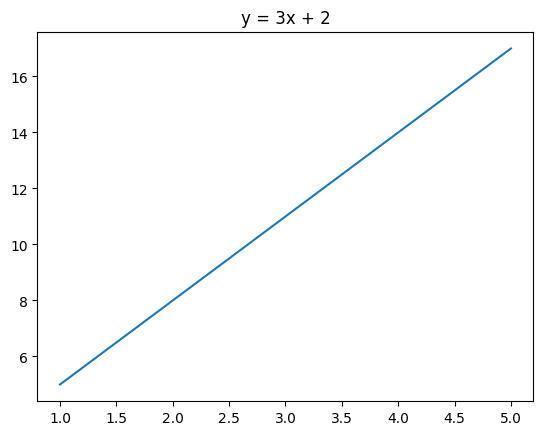

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## **2-5. Sequential API**

### **2-5-1. 모델 구조**

In [8]:
import tensorflow as tf

In [9]:
# 1. 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [10]:
# 2. add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### **2-5-2. 입력 데이터 형태**

In [11]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape = [4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

### **2-5-3. 단순 선형 회귀 모델 생성**

In [12]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

## **2-6. 모델 요약**

In [13]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **2-7. 컴파일**

In [14]:
# 긴 문자열 지정
model.compile(optimizer = 'sgd',
              loss = 'mean_squared_error',
              metrics = ['mean_squared_error', 'mean_absolute_error'])

In [15]:
# 짧은 문자열 지정
model.compile(optimizer = 'sgd',
              loss = 'mse',
              metrics = ['mse', 'mae'])

In [17]:
# 클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
])

## **2-8. 훈련**

In [18]:
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 482ms/step - loss: 203.9948 - mae: 13.2598
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 118.9375 - mae: 10.1574
Epoch 3/1200
1/1 [==============================] - 0s 19ms/step - loss: 69.3700 - mae: 7.7890
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 40.4840 - mae: 5.9809
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 23.6503 - mae: 4.6005
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 13.8401 - mae: 3.5467
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 8.1228 - mae: 2.7420
Epoch 8/1200
1/1 [==============================] - 0s 14ms/step - loss: 4.7906 - mae: 2.1277
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.8484 - mae: 1.6586
Epoch 10/1200
1/1 [==============================] - 0s 13ms/step - loss: 1.7162 - mae: 1.3004
Epoch 11/1200
1/1 [=============================

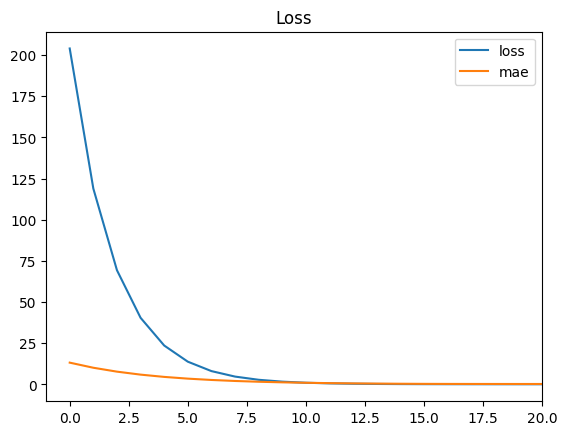

In [19]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## **2-9. 검증**

In [20]:
# 검증

model.evaluate(x, y)

1/1 [==============================] - 0s 138ms/step - loss: 4.2744e-05 - mae: 0.0056


[4.274364255252294e-05, 0.005611705593764782]

## **2-10. 예측**

In [21]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 97ms/step


array([[32.027122]], dtype=float32)

# **3. 심층 신경망으로 이미지 분류하기**

## **3-1. 케라스 내장 데이터셋 로드**

In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


- 훈련 셋에는 60000개의 데이터가, 검증 셋에는 10000개의 데이터가 저장되어 있음
- 입력 데이터에 해당하는 x_train, x_test에는 mnist 손글씨 이미지 데이터가 저장되어 있음
  - 28 by 28 size
- 각 입력 데이터에 대응되는 출력 데이터(정답) 또한 각각 60000개와 10000개가 1차원 벡터 형태로 정리되어 있음

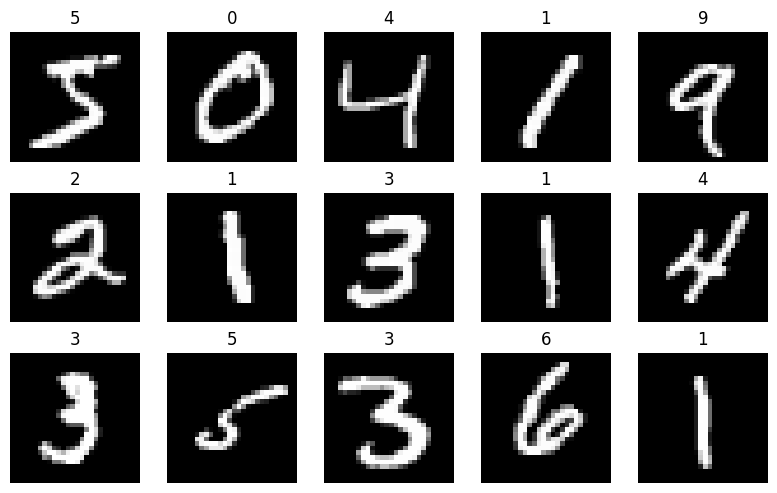

In [25]:
### 데이터 시각화

import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## **3-2. 데이터 전처리**
- 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

- 0 ~ 255 범위의 값으로 구성됨
  - 0 ~ 1 범위의 값을 가지도록 정규화하자!

In [27]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

정규화 변환 완료!

## **3-3. Flatten 레이어**

In [30]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [31]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## **3-4. 활성화 함수**

In [32]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [33]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## **3-5. 입력과 출력**

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [35]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## **3-6. 손실함수**

**출력 노드가 1개, sigmoid 활성화 함수를 적용한 경우**

In [36]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss = 'binary_crossentropy')

**출력 노드가 2개 이상, softmax 활성화 함수를 적용한 경우**

In [ ]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

## **3-7. 옵티마이저**

In [37]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## **3-8. 평가 지표**

In [38]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [39]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **3-9 훈련**

In [40]:
# 훈련
model.fit(x_train, y_train,
          # 검증셋 지정
          validation_data = (x_test, y_test),
          epochs = 10,
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2253 - accuracy: 0.9324 - val_loss: 0.0988 - val_accuracy: 0.9700
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0931 - accuracy: 0.9719 - val_loss: 0.0840 - val_accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.1075 - val_accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0498 - accuracy: 0.9837 - val_loss: 0.0816 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0792 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.0741 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0894 - val_ac

## **3-10. 평가**

In [41]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9767
검증셋 정확도: 0.9767000079154968


## **3-11. 예측**

In [42]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
# 예측 결과 출력
predictions[0]

array([8.4600735e-13, 3.1295905e-10, 2.4998407e-08, 1.9021040e-09,
       4.8076165e-12, 2.1763670e-14, 5.0932551e-17, 9.9999994e-01,
       9.6512735e-11, 1.8710233e-08], dtype=float32)

In [44]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


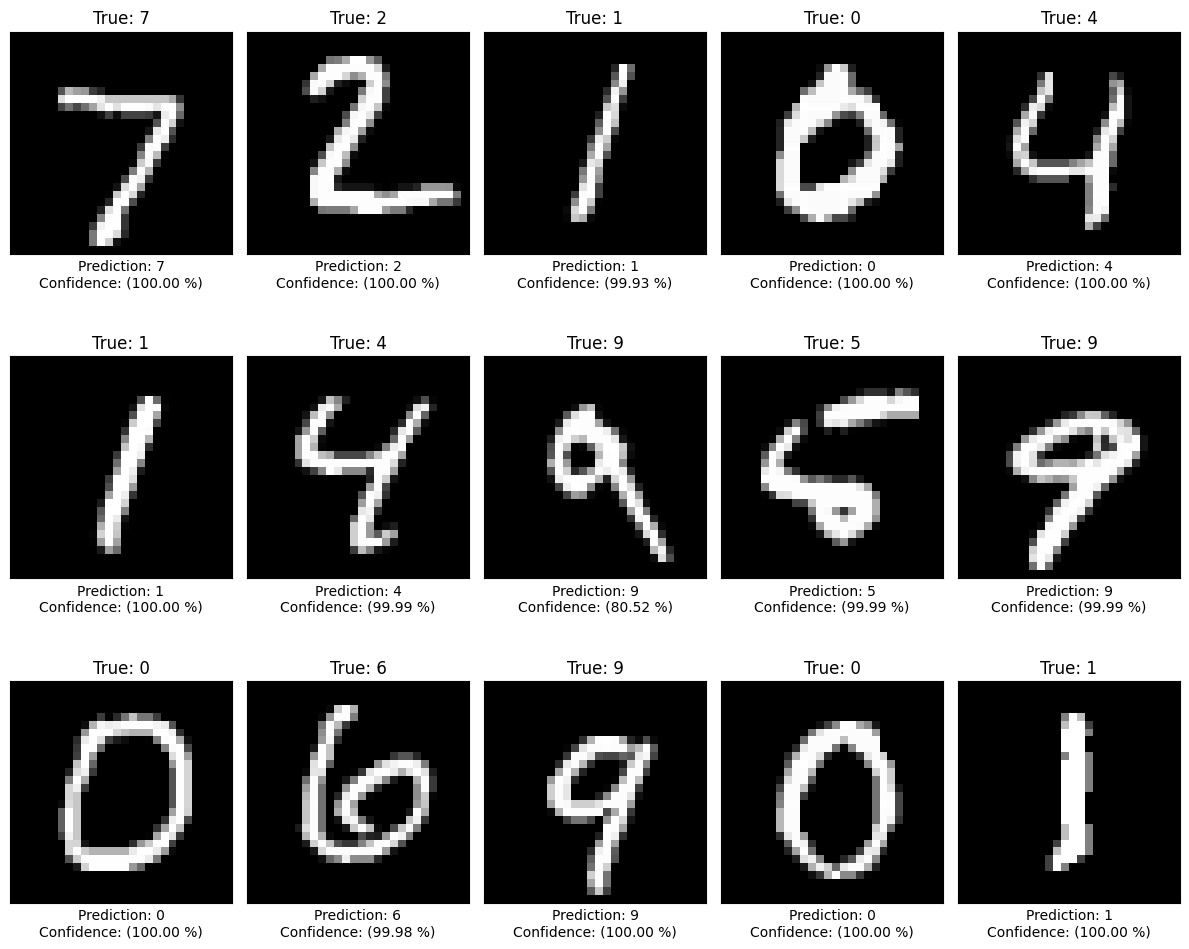

In [45]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])

  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
  ax = axes[i//5, i%5]

  img, y_true, y_pred, confidence = get_one_result(i)

  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()